In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Importing the necessary files
df = pd.read_csv("Data/Train_data.csv")
planes = pd.read_csv("Data/trains.csv")
airports = pd.read_csv("Data/Stations.csv")
carriers = pd.read_csv("Data/carriers.csv")

In [4]:
df.head(15)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,Train,tailnum,origin,dest,run_time,distance,hour,minute,time_hour
0,2021,1,1,517.0,515,2.0,830.0,819,11.0,CR,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2021 5:00
1,2021,1,1,533.0,529,4.0,850.0,830,20.0,CR,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2021 5:00
2,2021,1,1,542.0,540,2.0,923.0,850,33.0,NR,1141,N619NR,JFK,MIA,160.0,1089,5,40,1/1/2021 5:00
3,2021,1,1,544.0,545,-1.0,1004.0,1022,-18.0,NER,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2021 5:00
4,2021,1,1,554.0,600,-6.0,812.0,837,-25.0,SR,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2021 6:00
5,2021,1,1,554.0,558,-4.0,740.0,728,12.0,CR,1696,N39463,EWR,ORD,150.0,719,5,58,1/1/2021 5:00
6,2021,1,1,555.0,600,-5.0,913.0,854,19.0,NER,507,N516JB,EWR,FLL,158.0,1065,6,0,1/1/2021 6:00
7,2021,1,1,557.0,600,-3.0,709.0,723,-14.0,ER,5708,N829WER,LGA,IAD,53.0,229,6,0,1/1/2021 6:00
8,2021,1,1,557.0,600,-3.0,838.0,846,-8.0,NER,79,N593JB,JFK,MCO,140.0,944,6,0,1/1/2021 6:00
9,2021,1,1,558.0,600,-2.0,753.0,745,8.0,NR,301,N3ALNR,LGA,ORD,138.0,733,6,0,1/1/2021 6:00


In [5]:
# Checking the dimensions of the 'flight_data' dataset
df.shape

(336776, 19)

|Field|Data Type|Description|Type of Variable|Variable Category|
|-|-|-|-|-|
|year|Integer|2013|-|Ordinal|
|month|Integer|Jan = 1|-|Ordinal|
|day|Integer|1,2,3,..,31|Ordinal|
|dep_time|Integer|Military Time (1:00 PM  = 1300)|Predictor|Continuous|
|UniqueCarrier|String|Airline Carrier Code|Predictor|Categorical|
|ScheduledElapsedTime|Integer|Scheduled flight time in minutes|Predictor|Continuous|
|ArrDelay|Integer|Arrival delay in minutes||Continuous|
|DepDelay|Integer|Departure delay in minutes||Continuous|
|Distance|Integer|Distance in miles|Predictor|Continuous|

In [6]:
# Now checking whther the dataset contains the NULL values or not.
df.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
Train                0
tailnum           2512
origin               0
dest                 0
run_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

There are null values in `dep_time`, `dep_delay`, `arr_time`, `arr_delay`. We have to remove them.

In [7]:
# Dropping the rows that have NaN i.e. NULL values in them
df = df.dropna()

In [8]:
df.head(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,Train,tailnum,origin,dest,run_time,distance,hour,minute,time_hour
0,2021,1,1,517.0,515,2.0,830.0,819,11.0,CR,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2021 5:00
1,2021,1,1,533.0,529,4.0,850.0,830,20.0,CR,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2021 5:00
2,2021,1,1,542.0,540,2.0,923.0,850,33.0,NR,1141,N619NR,JFK,MIA,160.0,1089,5,40,1/1/2021 5:00
3,2021,1,1,544.0,545,-1.0,1004.0,1022,-18.0,NER,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2021 5:00
4,2021,1,1,554.0,600,-6.0,812.0,837,-25.0,SR,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2021 6:00
5,2021,1,1,554.0,558,-4.0,740.0,728,12.0,CR,1696,N39463,EWR,ORD,150.0,719,5,58,1/1/2021 5:00
6,2021,1,1,555.0,600,-5.0,913.0,854,19.0,NER,507,N516JB,EWR,FLL,158.0,1065,6,0,1/1/2021 6:00
7,2021,1,1,557.0,600,-3.0,709.0,723,-14.0,ER,5708,N829WER,LGA,IAD,53.0,229,6,0,1/1/2021 6:00
8,2021,1,1,557.0,600,-3.0,838.0,846,-8.0,NER,79,N593JB,JFK,MCO,140.0,944,6,0,1/1/2021 6:00
9,2021,1,1,558.0,600,-2.0,753.0,745,8.0,NR,301,N3ALNR,LGA,ORD,138.0,733,6,0,1/1/2021 6:00


In [9]:
df.tail(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,Train,tailnum,origin,dest,run_time,distance,hour,minute,time_hour
336760,2021,9,30,2211.0,2059,72.0,2339.0,2242,57.0,ER,4672,N12145,EWR,STL,120.0,872,20,59,30-09-2021 20:00
336761,2021,9,30,2231.0,2245,-14.0,2335.0,2356,-21.0,NER,108,N193JB,JFK,PWM,48.0,273,22,45,30-09-2021 22:00
336762,2021,9,30,2233.0,2113,80.0,112.0,30,42.0,CR,471,N578CR,EWR,SFO,318.0,2565,21,13,30-09-2021 21:00
336763,2021,9,30,2235.0,2001,154.0,59.0,2249,130.0,NER,1083,N804JB,JFK,MCO,123.0,944,20,1,30-09-2021 20:00
336764,2021,9,30,2237.0,2245,-8.0,2345.0,2353,-8.0,NER,234,N318JB,JFK,BTV,43.0,266,22,45,30-09-2021 22:00
336765,2021,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,NER,1816,N354JB,JFK,SYR,41.0,209,22,45,30-09-2021 22:00
336766,2021,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,NER,2002,N281JB,JFK,BUF,52.0,301,22,50,30-09-2021 22:00
336767,2021,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,NER,486,N346JB,JFK,ROC,47.0,264,22,46,30-09-2021 22:00
336768,2021,9,30,2307.0,2255,12.0,2359.0,2358,1.0,NER,718,N565JB,JFK,BOS,33.0,187,22,55,30-09-2021 22:00
336769,2021,9,30,2349.0,2359,-10.0,325.0,350,-25.0,NER,745,N516JB,JFK,PSE,196.0,1617,23,59,30-09-2021 23:00


In [10]:
# Dimension after dropping the rows containing NULL values
df.shape

(327346, 19)

In [11]:
# Now again checking whether the dataset till contains any NULL values
df.isnull().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
Train             0
tailnum           0
origin            0
dest              0
run_time          0
distance          0
hour              0
minute            0
time_hour         0
dtype: int64

In [12]:
# Before type casting of 'dep_time', 'dep_delay', 'arr_time', 'arr_delay'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            327346 non-null  int64  
 1   month           327346 non-null  int64  
 2   day             327346 non-null  int64  
 3   dep_time        327346 non-null  float64
 4   sched_dep_time  327346 non-null  int64  
 5   dep_delay       327346 non-null  float64
 6   arr_time        327346 non-null  float64
 7   sched_arr_time  327346 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         327346 non-null  object 
 10  Train           327346 non-null  int64  
 11  tailnum         327346 non-null  object 
 12  origin          327346 non-null  object 
 13  dest            327346 non-null  object 
 14  run_time        327346 non-null  float64
 15  distance        327346 non-null  int64  
 16  hour            327346 non-null  int64  
 17  minute    

In [13]:
# Type casting
df['dep_time'] = df['dep_time'].astype('int64')
df['dep_delay'] = df['dep_delay'].astype('int64')
df['arr_time'] = df['arr_time'].astype('int64')
df['arr_delay'] = df['arr_delay'].astype('int64')

In [14]:
# After type casting of 'dep_time', 'dep_delay', 'arr_time', 'arr_delay'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            327346 non-null  int64  
 1   month           327346 non-null  int64  
 2   day             327346 non-null  int64  
 3   dep_time        327346 non-null  int64  
 4   sched_dep_time  327346 non-null  int64  
 5   dep_delay       327346 non-null  int64  
 6   arr_time        327346 non-null  int64  
 7   sched_arr_time  327346 non-null  int64  
 8   arr_delay       327346 non-null  int64  
 9   carrier         327346 non-null  object 
 10  Train           327346 non-null  int64  
 11  tailnum         327346 non-null  object 
 12  origin          327346 non-null  object 
 13  dest            327346 non-null  object 
 14  run_time        327346 non-null  float64
 15  distance        327346 non-null  int64  
 16  hour            327346 non-null  int64  
 17  minute    

In [15]:
df.head(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,Train,tailnum,origin,dest,run_time,distance,hour,minute,time_hour
0,2021,1,1,517,515,2,830,819,11,CR,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2021 5:00
1,2021,1,1,533,529,4,850,830,20,CR,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2021 5:00
2,2021,1,1,542,540,2,923,850,33,NR,1141,N619NR,JFK,MIA,160.0,1089,5,40,1/1/2021 5:00
3,2021,1,1,544,545,-1,1004,1022,-18,NER,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2021 5:00
4,2021,1,1,554,600,-6,812,837,-25,SR,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2021 6:00
5,2021,1,1,554,558,-4,740,728,12,CR,1696,N39463,EWR,ORD,150.0,719,5,58,1/1/2021 5:00
6,2021,1,1,555,600,-5,913,854,19,NER,507,N516JB,EWR,FLL,158.0,1065,6,0,1/1/2021 6:00
7,2021,1,1,557,600,-3,709,723,-14,ER,5708,N829WER,LGA,IAD,53.0,229,6,0,1/1/2021 6:00
8,2021,1,1,557,600,-3,838,846,-8,NER,79,N593JB,JFK,MCO,140.0,944,6,0,1/1/2021 6:00
9,2021,1,1,558,600,-2,753,745,8,NR,301,N3ALNR,LGA,ORD,138.0,733,6,0,1/1/2021 6:00


## Exploratory Data Analysis

Let's check the number of flights per `month`

C:\Users\way2m\anaconda3\envs\project2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


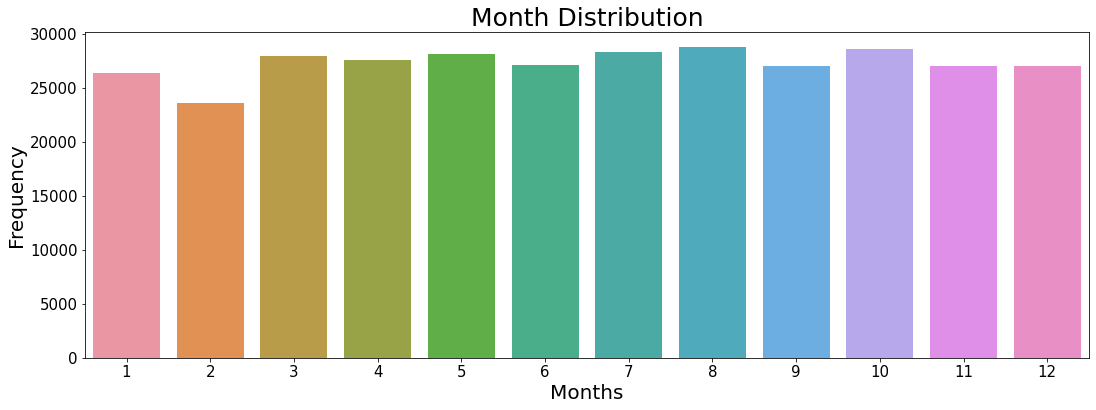

In [16]:
plt.figure(figsize = (18, 6))
sns.countplot(df['month'])
plt.title('Month Distribution', size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Months", size = 20)
plt.ylabel("Frequency", size = 20)
plt.show()

Flights are distributed fairly evenly among the months, but there is a slight decline at the beginning of the year in the month of __January__ and __February__

#### Market share of each Airline(`carrier`)


C:\Users\way2m\anaconda3\envs\project2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


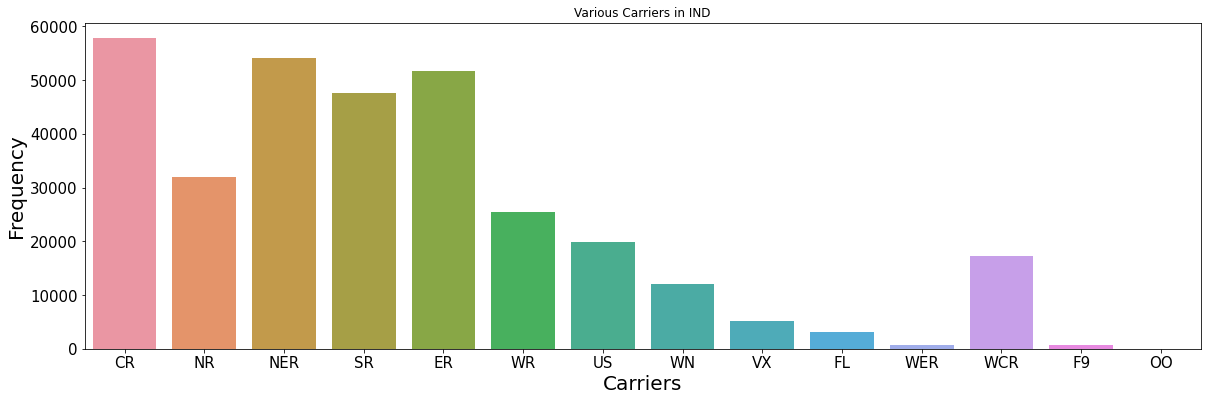

In [17]:
plt.figure(figsize = (20, 6))
sns.countplot(df['carrier'])
plt.title('Various Carriers in IND')
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Carriers", size = 20)
plt.ylabel("Frequency", size = 20)
plt.show()

In [18]:
df['carrier'].value_counts().to_frame()

,carrier
CR,57782
NER,54049
ER,51652
SR,47658
NR,31947
WR,25379
US,19831
WCR,17294
WN,12044
VX,5116


In [19]:
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = df['dep_delay'].groupby(df['carrier']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
carrier,,,,
OO,-14.0,154.0,29.0,12.586207
F9,-27.0,853.0,681.0,20.201175
WER,-21.0,225.0,709.0,5.830748
FL,-22.0,602.0,3175.0,18.605984
VX,-20.0,653.0,5116.0,12.756646
WN,-13.0,471.0,12044.0,17.661657
WCR,-24.0,747.0,17294.0,16.439574
US,-19.0,500.0,19831.0,3.744693
WR,-26.0,1301.0,25379.0,10.370661


ValueError: 'explode' must be of length 'x'

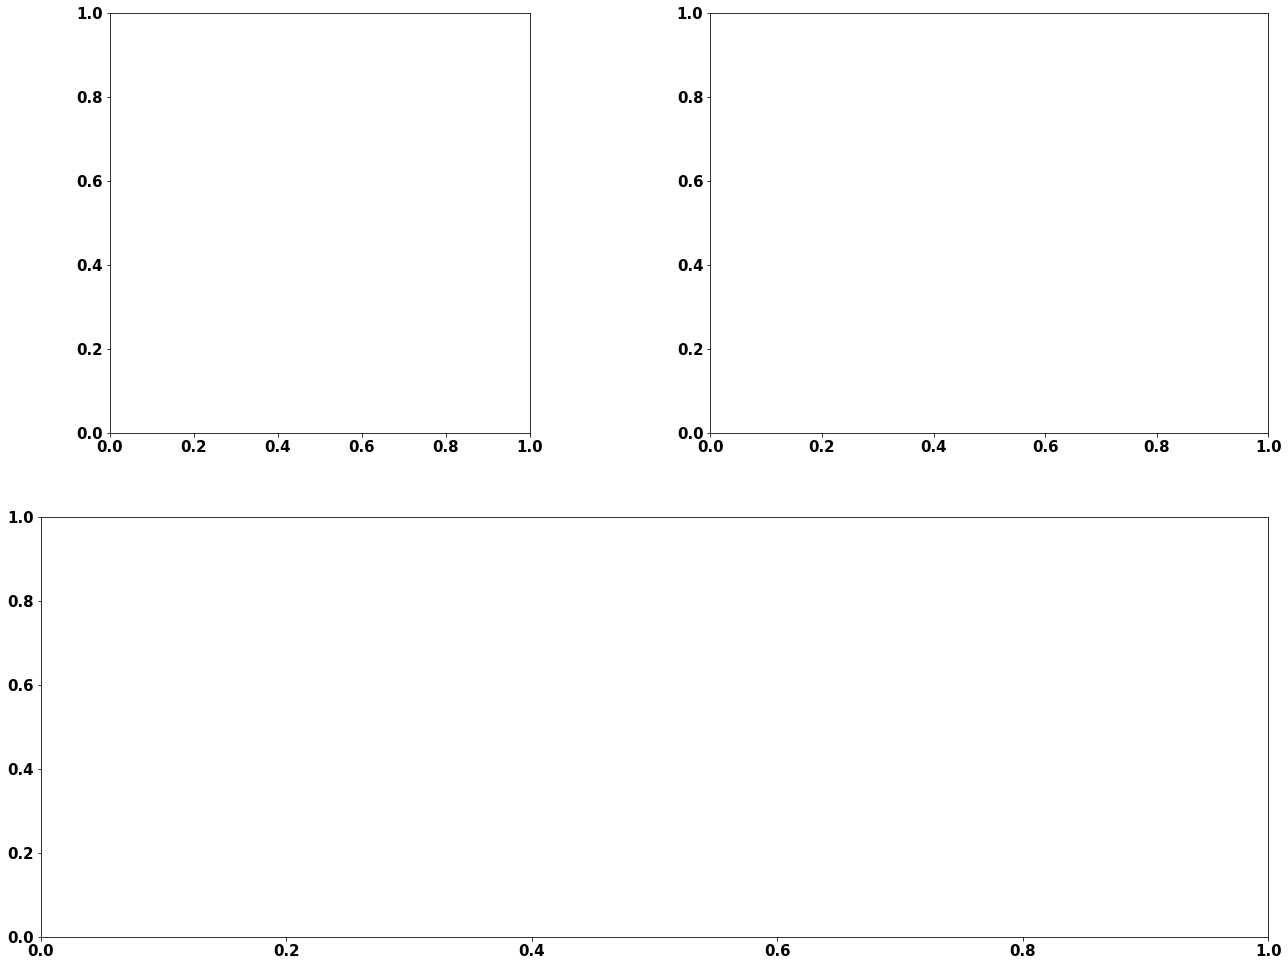

In [20]:
#___________________________________________
# graphs on flights, airports & delays
global_stats1 = global_stats
global_stats = global_stats1.head(14)
codes = global_stats.index.tolist()
carriers1 = carriers[carriers['IATA_CODE'].isin(codes)]
abbr_companies = carriers1.set_index('IATA_CODE')['AIRLINE'].to_dict()

font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
#__________________________________________________________________
# I extract a subset of columns and redefine the airlines labeling 
df2 = df.loc[:, ['carrier', 'dep_delay']]
df2['carrier'] = df2['carrier'].replace(abbr_companies)
#________________________________________________________________________
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
#___________________________________
fig = plt.figure(1, figsize=(22,17))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 
#------------------------------
# Pie chart nº1: nb of flights
#------------------------------
labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(len(abbr_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_stats.index[i] + ': ' + abbr_companies[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)
#----------------------------------------
# Pie chart nº2: mean delay at departure
#----------------------------------------
sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)
#------------------------------------------------------
# striplot with all the values reported for the delays
#___________________________________________________________________
# I redefine the colors for correspondance with the pie charts
codes = global_stats1.index.tolist()
carriers1 = carriers[carriers['IATA_CODE'].isin(codes)]
abbr_companies = carriers1.set_index('IATA_CODE')['AIRLINE'].to_dict()

colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue', 
          'black', 'grey', 'white', 'silver', 'black', 'pink']
#___________________________________________________________________
ax3 = sns.stripplot(y="carrier", x="dep_delay", size = 4, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
plt.tight_layout(w_pad=3)

#### Plot Mean Delay of various Airline(`carrier`)

KeyError: 'CR'

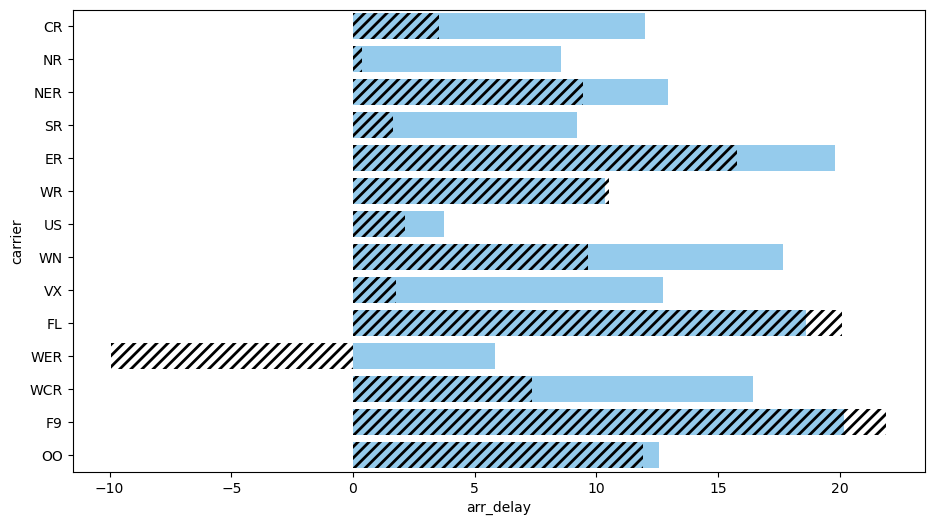

In [21]:
#plotting mean delays by airlines
carrier_code=carriers.set_index('IATA_CODE')['AIRLINE'].to_dict()
mpl.rc('patch', edgecolor = 'dimgray', linewidth = 1)
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0

fig = plt.figure(1, figsize = (11, 6))
ax = sns.barplot(x = 'dep_delay', y = 'carrier', data = df, color = 'lightskyblue', ci = None)
ax = sns.barplot(x = 'arr_delay', y = 'carrier', data = df, color = 'r', hatch = '///', alpha = 0.0, ci = None)
labels = [carrier_code[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel("Mean delay [min] (@departure: blue, @arrival: hatch lines)", fontsize = 15, weight = 'bold', labelpad = 10)

Text(0.5, 0, "5 Major Carrier's Mean Delay [min] (@departure: blue, @arrival: hatch lines)")

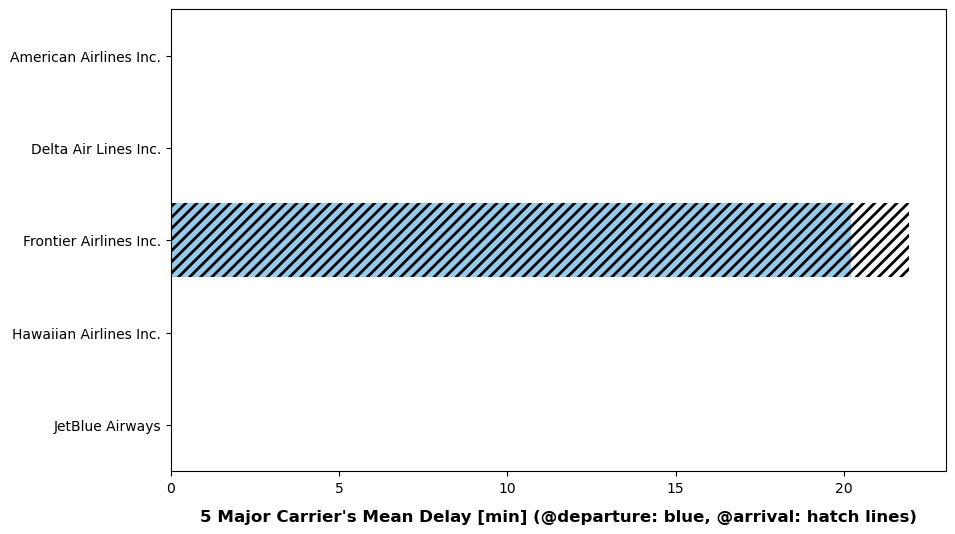

In [22]:
mpl.rc('patch', edgecolor = 'dimgray', linewidth = 1)
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0

fig = plt.figure(1, figsize = (10, 6))

#Subset 4 major airlines
ax = sns.barplot(x = 'dep_delay', y = 'carrier', data = df, order = ['AA', 'DL', 'F9', 'HA', 'B6'], color = 'lightskyblue', ci = None)
ax = sns.barplot(x = 'arr_delay', y = 'carrier', data = df, order = ['AA', 'DL', 'F9', 'HA', 'B6'], color = 'r', hatch = '///', alpha = 0.0, ci = None)
labels = [carrier_code[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel("5 Major Carrier's Mean Delay [min] (@departure: blue, @arrival: hatch lines)", fontsize = 12, weight = 'bold', labelpad = 10)

#### Plotting the Market Share of the Airports(`origin`) of New York 

In [23]:
df['origin'].value_counts().to_frame()

,origin
EWR,117127
JFK,109079
LGA,101140


|origin|airport|
|-|-|
|EWR|Newark Liberty International Airport|
|JFK|John F. Kennedy International Airport|
|LGA|LaGuardia Airport|

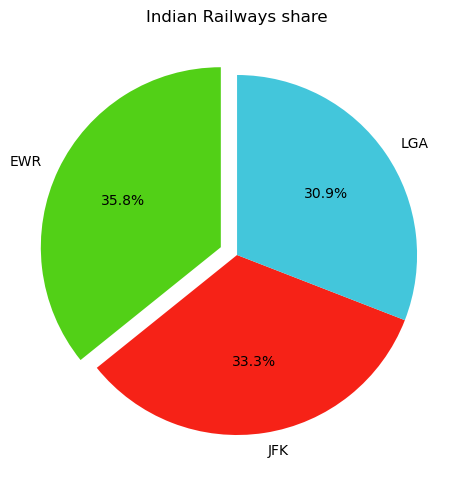

In [25]:
plt.pie(
    df['origin'].value_counts(),
    labels = df['origin'].value_counts().index,
    explode = (0.1, 0, 0),
    startangle = 90,
    autopct = '%1.1f%%',
    colors = ['#52D017', '#F62217', '#43C6DB']
)

plt.tight_layout()
plt.title("Indian Railways share")
plt.show()

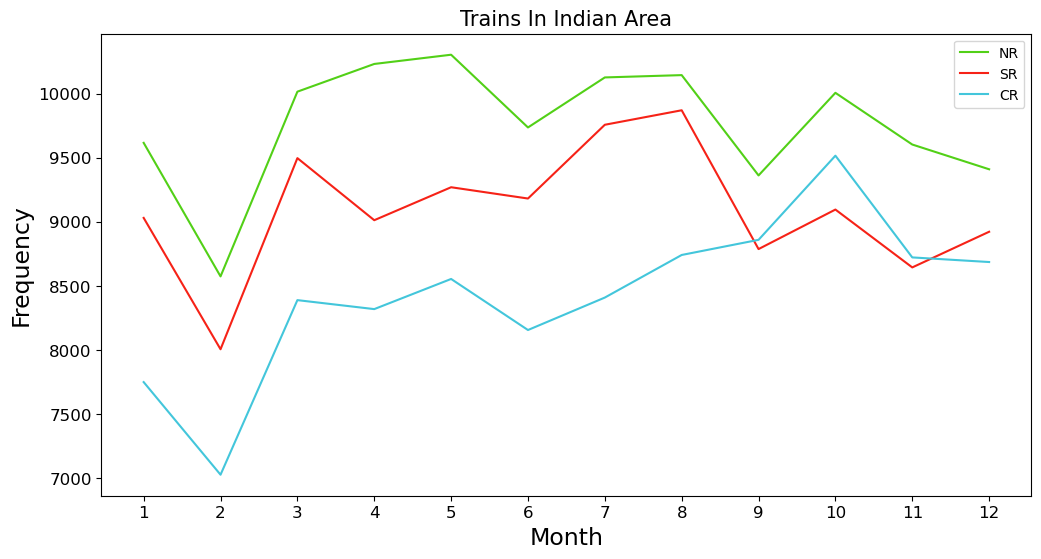

In [40]:
fig = plt.figure(1, figsize = (12, 6))
df[df['origin'] == 'EWR']['month'].value_counts().sort_index().plot(kind = 'line', color = '#52D017')
df[df['origin'] == 'JFK']['month'].value_counts().sort_index().plot(kind = 'line', color = '#F62217')
df[df['origin'] == 'LGA']['month'].value_counts().sort_index().plot(kind = 'line', color = '#43C6DB')

plt.title("Trains In Indian Area", size = 15)
plt.xticks(range(1, 13), size = 12)
plt.yticks(size = 12)
plt.xlabel("Month", size = 17)
plt.ylabel("Frequency", size = 17)
plt.legend(['NR', 'SR', 'CR'])

## Modelling

In [28]:
def map_labels(delays):
    if delays > 15:
        return 1
    else:
        return 0

df['delayed'] = ((df['dep_delay'].map(map_labels) + df['arr_delay'].map(map_labels)) != 0).astype(int)
df['delayed'].value_counts(normalize = True)

0    0.720406
1    0.279594
Name: delayed, dtype: float64

In [29]:
df.head(20)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,Train,tailnum,origin,dest,run_time,distance,hour,minute,time_hour,delayed
0,2021,1,1,517,515,2,830,819,11,CR,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2021 5:00,0
1,2021,1,1,533,529,4,850,830,20,CR,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2021 5:00,1
2,2021,1,1,542,540,2,923,850,33,NR,1141,N619NR,JFK,MIA,160.0,1089,5,40,1/1/2021 5:00,1
3,2021,1,1,544,545,-1,1004,1022,-18,NER,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2021 5:00,0
4,2021,1,1,554,600,-6,812,837,-25,SR,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2021 6:00,0
5,2021,1,1,554,558,-4,740,728,12,CR,1696,N39463,EWR,ORD,150.0,719,5,58,1/1/2021 5:00,0
6,2021,1,1,555,600,-5,913,854,19,NER,507,N516JB,EWR,FLL,158.0,1065,6,0,1/1/2021 6:00,1
7,2021,1,1,557,600,-3,709,723,-14,ER,5708,N829WER,LGA,IAD,53.0,229,6,0,1/1/2021 6:00,0
8,2021,1,1,557,600,-3,838,846,-8,NER,79,N593JB,JFK,MCO,140.0,944,6,0,1/1/2021 6:00,0
9,2021,1,1,558,600,-2,753,745,8,NR,301,N3ALNR,LGA,ORD,138.0,733,6,0,1/1/2021 6:00,0


In [30]:
df.tail(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,Train,tailnum,origin,dest,run_time,distance,hour,minute,time_hour,delayed
336765,2021,9,30,2240,2245,-5,2334,2351,-17,NER,1816,N354JB,JFK,SYR,41.0,209,22,45,30-09-2021 22:00,0
336766,2021,9,30,2240,2250,-10,2347,7,-20,NER,2002,N281JB,JFK,BUF,52.0,301,22,50,30-09-2021 22:00,0
336767,2021,9,30,2241,2246,-5,2345,1,-16,NER,486,N346JB,JFK,ROC,47.0,264,22,46,30-09-2021 22:00,0
336768,2021,9,30,2307,2255,12,2359,2358,1,NER,718,N565JB,JFK,BOS,33.0,187,22,55,30-09-2021 22:00,0
336769,2021,9,30,2349,2359,-10,325,350,-25,NER,745,N516JB,JFK,PSE,196.0,1617,23,59,30-09-2021 23:00,0


In [31]:
# feature omission
columns_to_remove = ['dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'Train', 'tailnum', 'run_time', 'distance', 'hour', 'minute', 'time_hour']
df.drop(columns_to_remove, axis = 1, inplace = True)

In [32]:
df.head()

,year,month,day,carrier,origin,dest,delayed
0,2021,1,1,CR,EWR,IAH,0
1,2021,1,1,CR,LGA,IAH,1
2,2021,1,1,NR,JFK,MIA,1
3,2021,1,1,NER,JFK,BQN,0
4,2021,1,1,SR,LGA,ATL,0


In [33]:
df['delayed'].value_counts().to_frame()

,delayed
0,235822
1,91524


In [34]:
df['dest'].value_counts().to_frame()

,dest
ATL,16837
ORD,16566
LAX,16026
BOS,15022
MCO,13967
CLT,13674
SFO,13173
FLL,11897
MIA,11593
DCA,9111


In [35]:
#df.drop(df[df['dest'].isin(["LEX","TVC","MYR","CHO","BZN","JAC","PSP","EYW","HDN","MTJ","SBN","ANC"])].index, inplace = True , axis = 0)

In [36]:
#print(df.shape)

In [37]:
#df['delayed'].value_counts().to_frame()

In [38]:
saving_data = df.to_csv("Data/Processed_data15.csv", index = False)